In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

def urltemplate(template):
    def opener(**kwargs):
        return urlopen(template.format_map(kwargs))
    return opener

def getUPC(apno):
	Usurltempale ="http://patft.uspto.gov/netacgi/nph-Parser?Sect2=PTO1&Sect2=HITOFF&p=1&u=%2Fnetahtml%2FPTO%2Fsearch-bool.html&r=1&f=G&l=50&d=PALL&RefSrch=yes&Query=PN%2F{patNo}"
	USpatent = urltemplate(Usurltempale)

	Pat_html = USpatent(patNo=apno)
	bsObj = BeautifulSoup(Pat_html.read(), "lxml")
	tables = bsObj.findChildren("table")

	############################################################
	#尋找包含"Current U.S. Class:"的表，有時在第4個有時在第5個
	############################################################

	p = tables[0].find(text=re.compile('Current U.S. Class:'))
	i = 2
	while p == None:
	    i += 1
	    p = tables[i].find(text=re.compile('Current U.S. Class:'))
	    #print(i,p)


	############################################################
	#取出包含"Current U.S. Class:"的表內的每一欄位的文字或字串。
	############################################################
	datas = []
	rows = tables[i].findChildren(['tr'])
	for row in rows:
	    cells = row.findChildren('td')
	    for cell in cells:
	        cell_content = cell.getText()
	        cleandata = re.sub( '\s+'    , ' ', cell_content).strip()
	        cleandata = re.sub( '\(.*?\)', '' , cleandata).strip()
	        cleandata = re.sub( '&nbsp'  , ' ', cleandata).strip()    
	        datas.append(cleandata)         
	return datas


In [2]:
patlist = ['233681', '264476', '436971', '444505', '460576', '527611', '569462', '714664', '1017579', '1082480', '1196083', '1210038', '1663402', '1833792', '1924951', '3495898', '3701591', '3944344', '4012130', '4026640', '4152051', '4240718', '4377328', '4389102', '4506961', '4616367', '4652098', '4684226', '4712893', '4740069', '4802753', '4813776', '4820034', '4885808', '4924245', '4925291', '5087117', '5281983', '5315328', '5398377', '5422685', '5426473', '5440356', '5469232', '5570492', '5579062', '5596789', '5606743', '5631718', '5631719', '5642178', '5666181', '5684559', '5729321', '5732444', '5739891', '5739892', '5745952', '5764330', '5790229', '5791015', '5801804', '5801806', '5818566', '5818567', '5818568', '5844655', '5847801', '5894336', '5898471', '5903332', '5963296', '5971539', '5980039', '5984472', '6000797', '6050685', '6050686', '6059410', '6089709', '6099120', '6139143', '6193368', '6210004', '6217170', '6234628', '6238048', '6244704', '6254235', '6260965', '6296355', '6302539', '6357874', '6412944', '6422699', '6481053', '6494574', '6540351', '6575570', '6585372', '6588895', '6752496', '6755523', '6779887', '6786594', '6935740', '6948811', '7011406', '7018038', '7029115', '7080904', '7090347', '7091634', '7101039', '7175270', '7175276', '7210777', '7237892', '7246901', '7284853', '7344242', '7410253', '7422322', '7441890', '7472990', '7484844', '7497571', '7513617', '7540608', '7543931', '7553013', '7604347', '7621633', '7628484', '7637609', '7645040', '7695133', '7703913', '7703914', '7712894', '7712896', '7744212', '7758789', '7794080', '7815306', '7900281', '7997722', '8020988', '8029133', '8038291', '8042939', '8083345', '8087775', '8142012', '8177360', '8192017', '8256894', '8282208', '8292425', '8353593', '8371692']
mixeddata = list (map(getUPC, patlist))                 #取得所有專利的 UPC

mixeddata

[['Current U.S. Class:',
  '351/68; 267/72',
  'Current CPC Class:',
  'G02C 5/02',
  'Current International Class:',
  'G02C 5/00'],
 ['Current U.S. Class:',
  '184/50.1; 184/104.1',
  'Current CPC Class:',
  'F16N 7/30',
  'Current International Class:',
  'F16N 7/00'],
 ['Current U.S. Class:',
  '351/71',
  'Current CPC Class:',
  'G02C 5/12',
  'Current International Class:',
  'G02C 5/12 ; G02C 5/00'],
 ['Current U.S. Class:',
  '351/118',
  'Current CPC Class:',
  'G02C 5/20',
  'Current International Class:',
  'G02C 5/20 ; G02C 5/14'],
 ['Current U.S. Class:',
  '351/123',
  'Current CPC Class:',
  'G02C 5/143 ; G02C 5/16 ; G02C 2200/10',
  'Current International Class:',
  'G02C 5/14 ; G02C 5/16'],
 ['Current U.S. Class:',
  '351/68; 267/72',
  'Current CPC Class:',
  'G02C 5/02',
  'Current International Class:',
  'G02C 5/00'],
 ['Current U.S. Class:',
  '351/111; 351/118',
  'Current CPC Class:',
  'G02C 5/143',
  'Current International Class:',
  'G02C 5/14'],
 ['Current U

In [3]:
upclist = [x[1] for x in mixeddata] #mixeddata[0][1]
cpclist = [x[3] for x in mixeddata] #mixeddata[0][1]
Ipclist = [x[5] for x in mixeddata] #mixeddata[0][1]


In [4]:
#UPC
g = upclist              #要在這裡變更參數
ag = ";".join(g)
sg = list (map(str.strip, ag.split(';'))) 

from collections import Counter
D = Counter(sg)   #計算各類別的數量

print(D)

Counter({'351/153': 81, '16/228': 78, '351/121': 26, '351/123': 24, '351/111': 21, '351/113': 19, '351/116': 14, '351/114': 12, '351/119': 12, '351/110': 12, '351/137': 9, '351/140': 9, '351/118': 8, '351/126': 7, '351/128': 7, '351/41': 7, '351/124': 6, '351/156': 6, '351/63': 6, '351/47': 5, '351/68': 4, '351/59': 4, '351/120': 4, '351/158': 4, '351/155': 3, '2/452': 3, '2/453': 3, '351/57': 3, '351/88': 3, '351/149': 3, '351/90': 3, '351/106': 3, '351/44': 3, '351/97': 3, '267/72': 2, '351/60': 2, '351/132': 2, '351/130': 2, '351/65': 2, '351/62': 2, '351/157': 2, '351/136': 2, '351/117': 2, '351/122': 2, '351/92': 2, '351/95': 2, '16/224': 2, '403/135': 2, '2/431': 2, '351/115': 2, '351/89': 2, '351/103': 2, '351/48': 2, '351/58': 2, '351/86': 2, '184/50.1': 1, '184/104.1': 1, '351/71': 1, 'D16/316': 1, 'D16/332': 1, 'D16/337': 1, '351/87': 1, '351/94': 1, '351/83': 1, 'D16/324': 1, 'D16/327': 1, '2/909': 1, '2/DIG.11': 1, '351/138': 1, '351/76': 1, '16/DIG.13': 1, '2/449': 1, '2/4

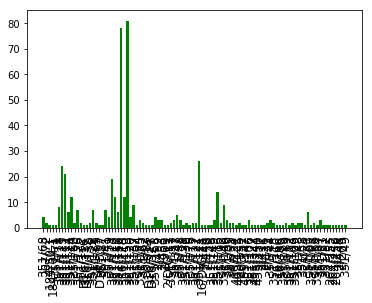

In [5]:
import matplotlib.pyplot as plt

plt.bar(   range(len(D)), D.values(), color='g', align='center')
plt.xticks(range(len(D)), D.keys()  , fontsize = 12, rotation='vertical')

plt.show()


Counter({'Y10T 16/526': 82, 'G02C 5/2209': 66, 'G02C 5/008': 27, 'G02C 5/143': 25, 'G02C 5/10': 25, 'G02C 2200/08': 23, 'G02C 5/2254': 23, 'G02C 5/20': 22, 'G02C 5/16': 22, 'G02C 3/003': 20, 'G02C 2200/22': 19, 'G02C 2200/10': 18, 'G02C 2200/16': 16, 'G02C 5/2263': 16, 'G02C 1/08': 15, 'G02C 5/06': 14, 'G02C 5/146': 14, 'G02C 11/00': 12, 'G02C 2200/20': 12, 'G02C 1/02': 11, 'G02C 5/22': 10, 'G02C 5/04': 10, 'G02C 2200/12': 10, 'G02C 5/126': 8, 'G02C 5/00': 8, 'G02C 5/006': 8, 'G02C 2200/18': 8, 'G02C 11/08': 7, 'G02C 2200/02': 7, 'G02C 5/2272': 7, 'G02C 5/02': 5, 'G02C 9/00': 5, 'G02C 9/02': 4, 'G02C 1/04': 4, 'G02C 5/2227': 4, 'G02C 2200/26': 4, 'G02C 5/2236': 4, 'G02C 5/12': 3, 'G02C 1/06': 3, 'G02C 5/001': 3, 'G02C 2200/30': 3, 'G02C 3/02': 2, 'A61F 9/027': 2, 'A61F 9/029': 2, 'G02C 5/08': 2, 'G02C 5/122': 2, 'Y10T 16/524': 2, 'Y10T 403/32737': 2, 'G02C 2200/04': 2, 'G02C 3/04': 2, 'G02C 5/229': 2, 'F16N 7/30': 1, 'G02C 5/128': 1, 'G02C 5/005': 1, 'G02C 5/18': 1, 'A42B 1/247': 1, 'G

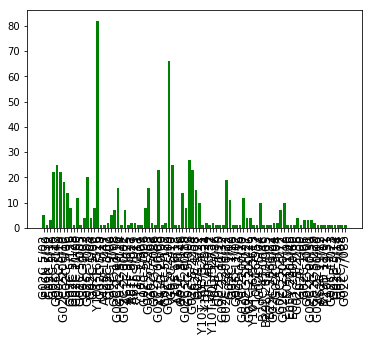

In [6]:
#UPC
g = cpclist              #要在這裡變更參數
ag = ";".join(g)
sg = list (map(str.strip, ag.split(';'))) 

from collections import Counter
D = Counter(sg)   #計算各類別的數量
print(D)

import matplotlib.pyplot as plt

plt.bar(   range(len(D)), D.values(), color='g', align='center')
plt.xticks(range(len(D)), D.keys()  , fontsize = 12, rotation='vertical')

plt.show()






Counter({'G02C 5/22': 73, 'G02C 5/14': 43, 'G02C 005/22': 37, 'G02C 5/00': 33, 'G02C 005/14': 23, 'G02C 5/16': 17, 'G02C 3/00': 16, 'G02C 1/00': 16, 'G02C 9/00': 11, 'G02C 005/16': 11, 'G02C 1/02': 11, 'G02C 5/20': 9, 'G02C 5/12': 8, 'G02C 11/00': 7, 'G02C 005/12': 7, 'G02C 1/08': 7, 'G02C 5/06': 6, 'G02C 005/00': 5, 'G02C 001/02': 4, 'G02C 005/06': 4, 'G02C 003/00': 4, 'A61F 9/02': 4, 'G02C 1/04': 3, 'G02C 9/02': 3, 'G02C 001/00': 3, 'A61F 009/02': 3, 'G02C 005/20': 3, 'G02C 009/00': 3, 'G02C 5/04': 3, 'G02C 5/08': 3, 'G02C 005/02': 2, 'G02C 3/02': 2, 'G02C 009/02': 2, 'G02C 11/08': 2, 'G02C 005/04': 2, 'G02C 007/10': 2, 'G02C 005/08': 2, 'F16N 7/00': 1, 'G02C 011/08': 1, 'G02C 7/02': 1, 'G02C 7/08': 1, 'G02C 007/08': 1, 'A41D 20/00': 1, 'G02C 005/18': 1, 'G02C 001/08': 1, 'G02C 11/06': 1, 'H04B 1/08': 1, 'H04B 001/08': 1, 'G02C 003/02': 1, 'G02C 7/16': 1, 'G02C 7/10': 1, 'G02C 7/00': 1, 'E03D 011/00': 1, 'E05D 007/00': 1, 'G02C 001/04': 1, 'G02C 1/06': 1, 'G02B 005/22': 1, 'G02C 11/0

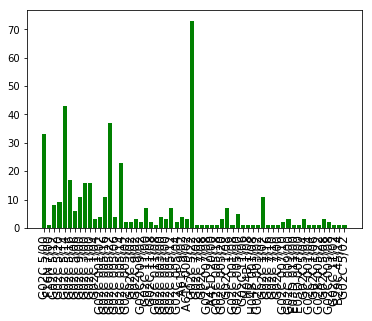

In [7]:
g = Ipclist              #要在這裡變更參數
ag = ";".join(g)
sg = list (map(str.strip, ag.split(';'))) 

from collections import Counter
D = Counter(sg)   #計算各類別的數量
print(D)

import matplotlib.pyplot as plt

plt.bar(   range(len(D)), D.values(), color='g', align='center')
plt.xticks(range(len(D)), D.keys()  , fontsize = 12, rotation='vertical')

plt.show()


In [2]:
#patlist = ['5896186', '6530660', '6817710', '7070273', '7566127', '7886405', '8517532', '9541771']
patlist = ['5896186']


mixeddata = list (map(getUPC, patlist)) #取得所有專利的 UPC

mixeddata

[['Current U.S. Class:',
  '351/110; 16/228; 351/121; 351/146; 351/153; 351/47',
  'Current CPC Class:',
  'G02C 1/02 ; G02C 1/06 ; G02C 5/2209 ; G02C 5/2272 ; G02C 5/229 ; G02C 9/00 ; Y10T 16/526',
  'Current International Class:',
  'G02C 9/00 ; G02C 5/22 ; G02C 1/02 ; G02C 1/00 ; G02C 1/06 ; G02C 001/02 ; G02C 005/22',
  'Field of Search:',
  ';351/44,47,111,115,121,124,133,146,153,110 ;16/228']]